In [1]:
s = '1111'

In [2]:
n = len(s)

In [3]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
q = QuantumRegister(2*n)
c = ClassicalRegister(2*n)
qc = QuantumCircuit(q,c)

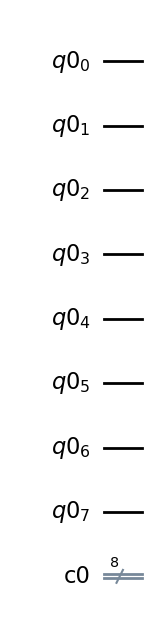

In [4]:
qc.draw('mpl')

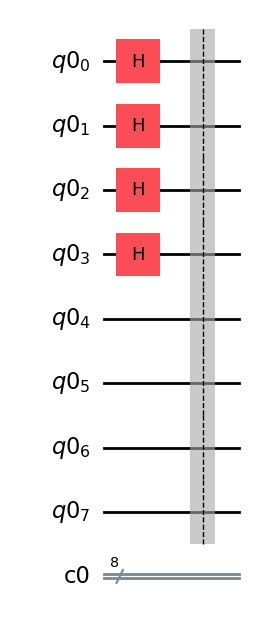

In [5]:
for i in range(n):
    qc.h(q[i])
qc.barrier()
qc.draw('mpl')

In [6]:
def simon_oracle(secret_string):
    """
    Constructs a Simon Oracle quantum circuit for a given secret string.
    

    """
    n = len(secret_string)  # Number of input/output qubits
    oracle = QuantumCircuit(2 * n)  # Create a circuit with n input qubits and n output qubits
    
    for i, bit in enumerate(secret_string):
        if bit == '1':
            oracle.cx(i, i + n)
            oracle.cx(0, i + n)  

    return oracle

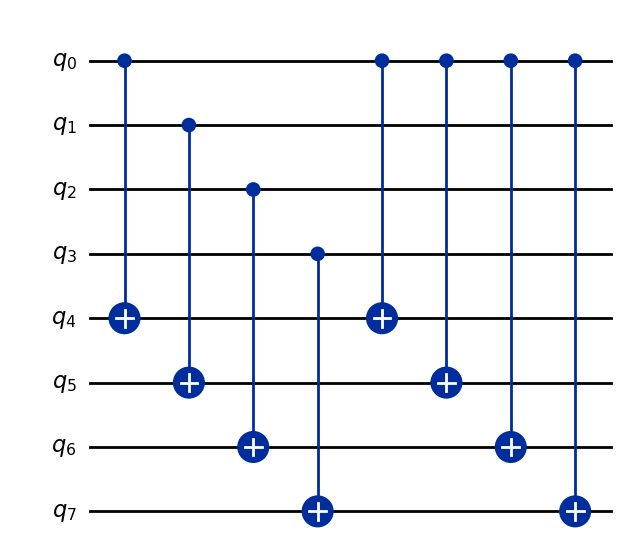

In [7]:
simon = simon_oracle(s)
simon.draw('mpl')
# Draw the Simon oracle circuit

In [8]:
qc= qc.compose(simon)

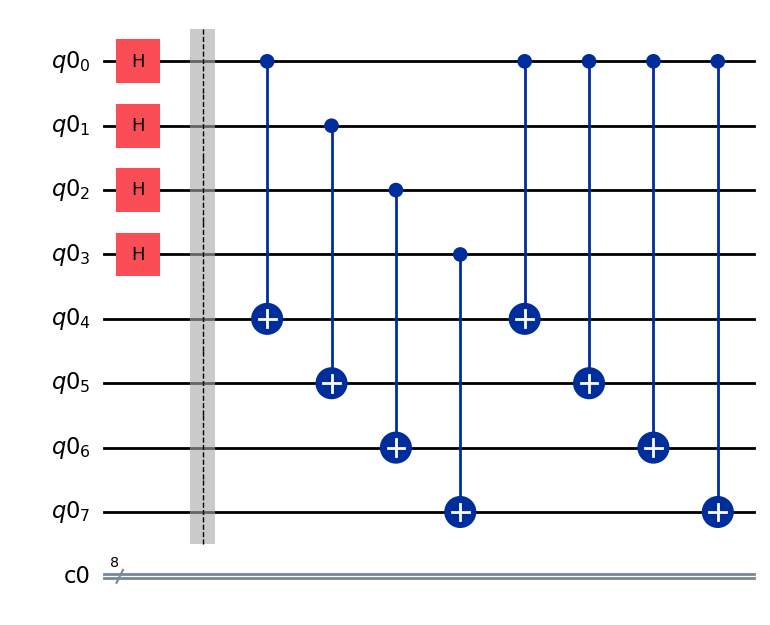

In [9]:
qc.draw('mpl')

In [10]:
qc.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=8, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(8, 'q0'), 0), Qubit(QuantumRegister(8, 'q0'), 1), Qubit(QuantumRegister(8, 'q0'), 2), Qubit(QuantumRegister(8, 'q0'), 3), Qubit(QuantumRegister(8, 'q0'), 4), Qubit(QuantumRegister(8, 'q0'), 5), Qubit(QuantumRegister(8, 'q0'), 6), Qubit(QuantumRegister(8, 'q0'), 7)), clbits=())

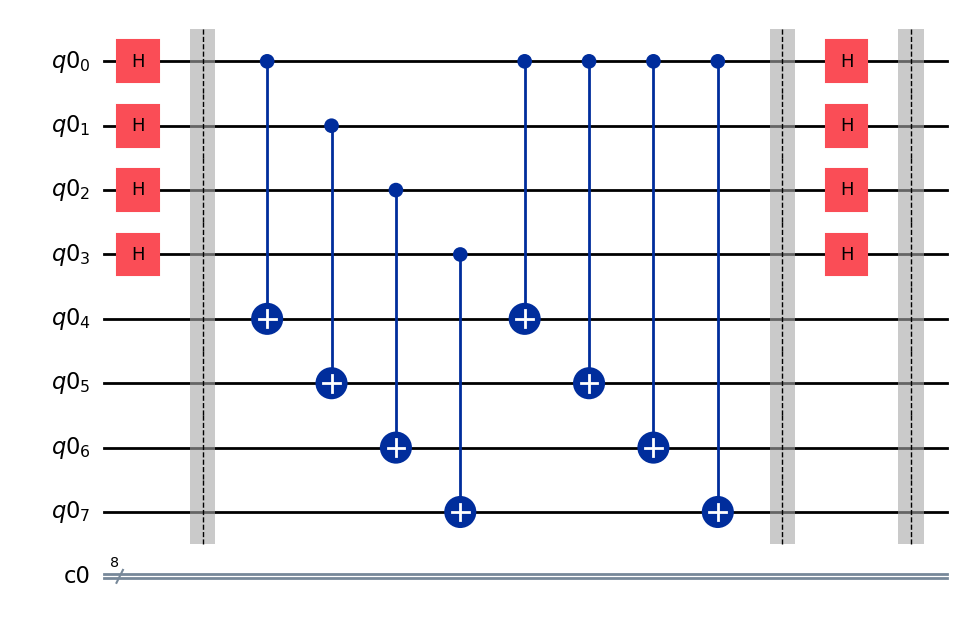

In [11]:
for i in range(n):
    qc.h(q[i])
qc.barrier()
qc.draw('mpl')

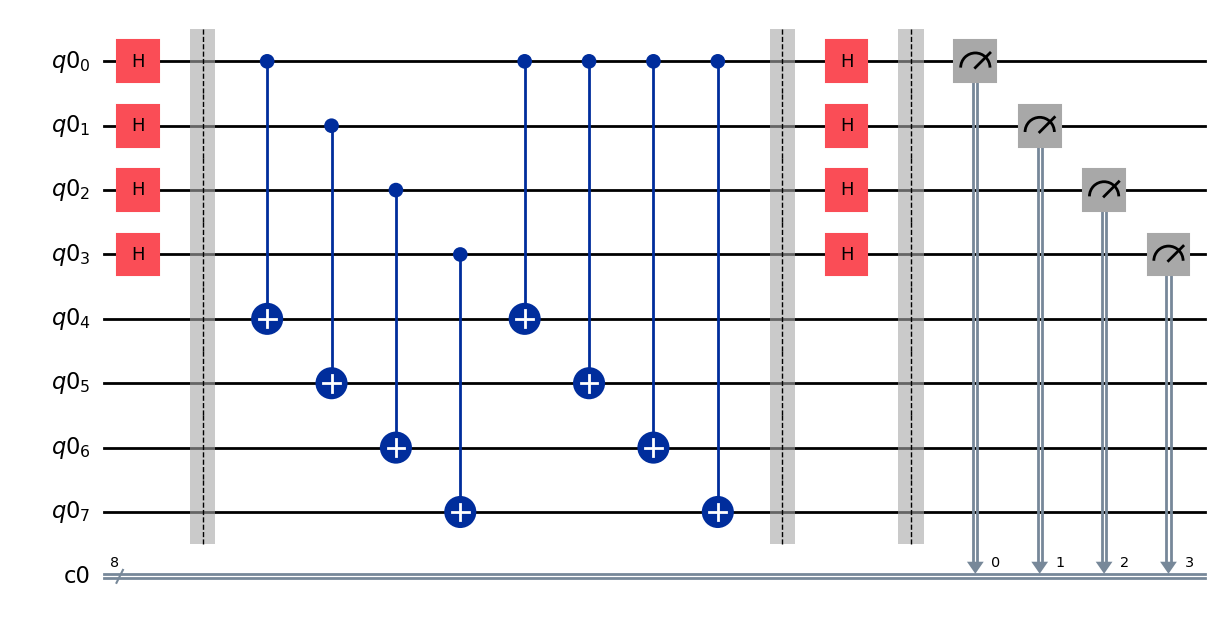

In [12]:
for i in range(n):
    qc.measure(q[i],c[i])
qc.draw('mpl')

{'00000011': 138, '00001100': 134, '00001111': 132, '00000110': 134, '00001010': 107, '00001001': 125, '00000000': 133, '00000101': 121}


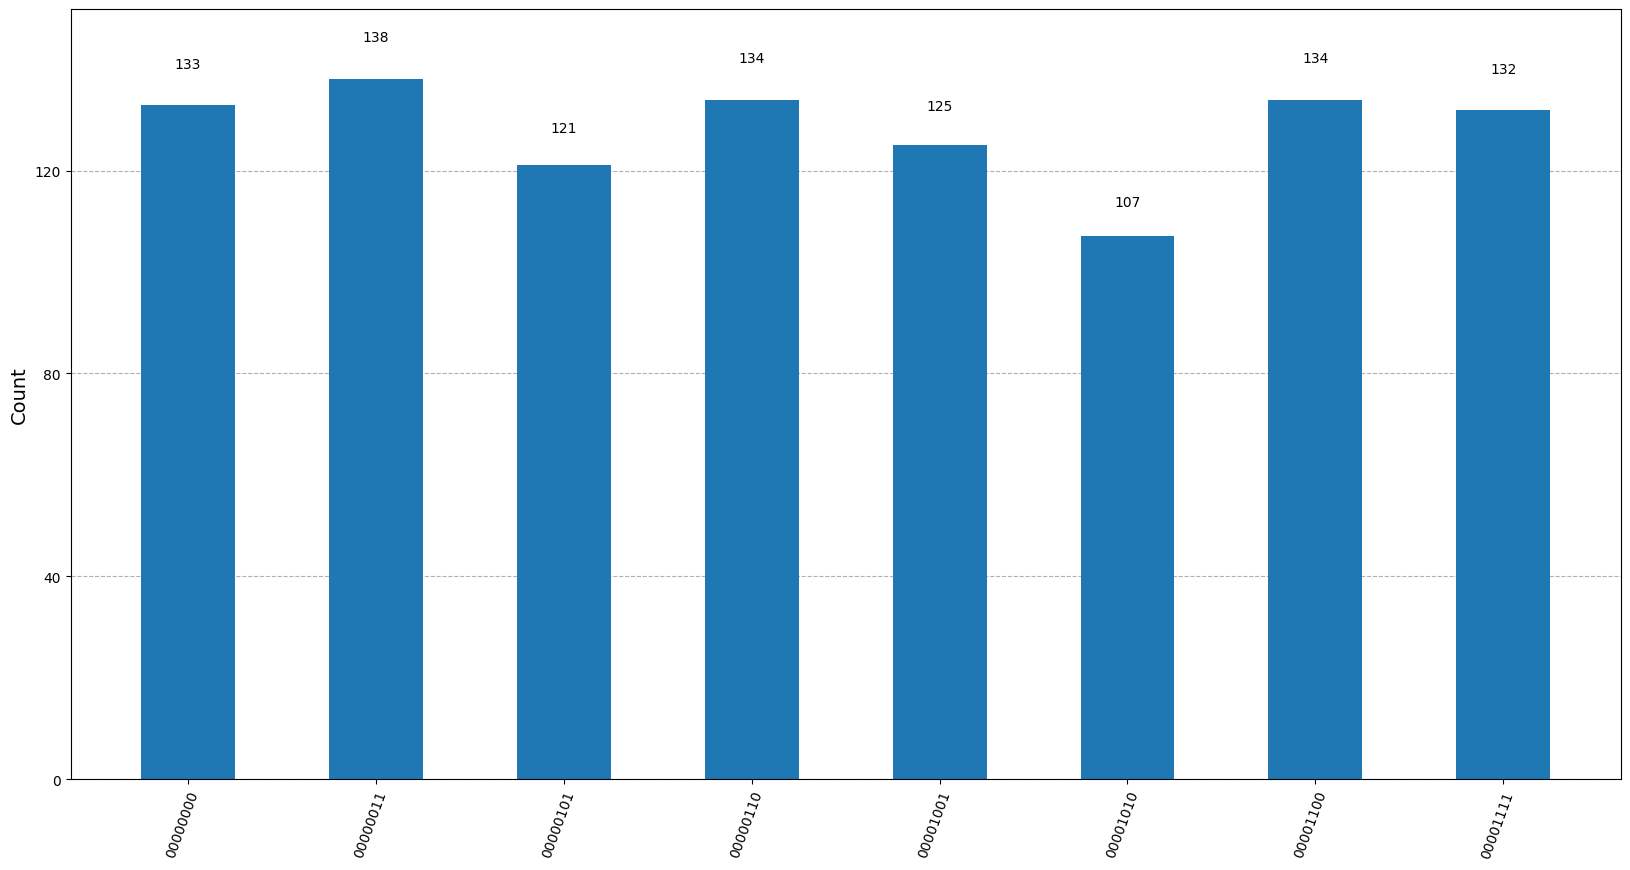

In [20]:
from qiskit import transpile
from qiskit_aer import QasmSimulator
backend = QasmSimulator()
qc_compiled = transpile(qc,backend)
job = backend.run(qc_compiled,shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)

from qiskit.visualization import plot_histogram
plot_histogram(counts,figsize=(20,10))

In [14]:
from qiskit_ibm_runtime.fake_provider import FakeJohannesburgV2

In [22]:
device_simulator = FakeJohannesburgV2()

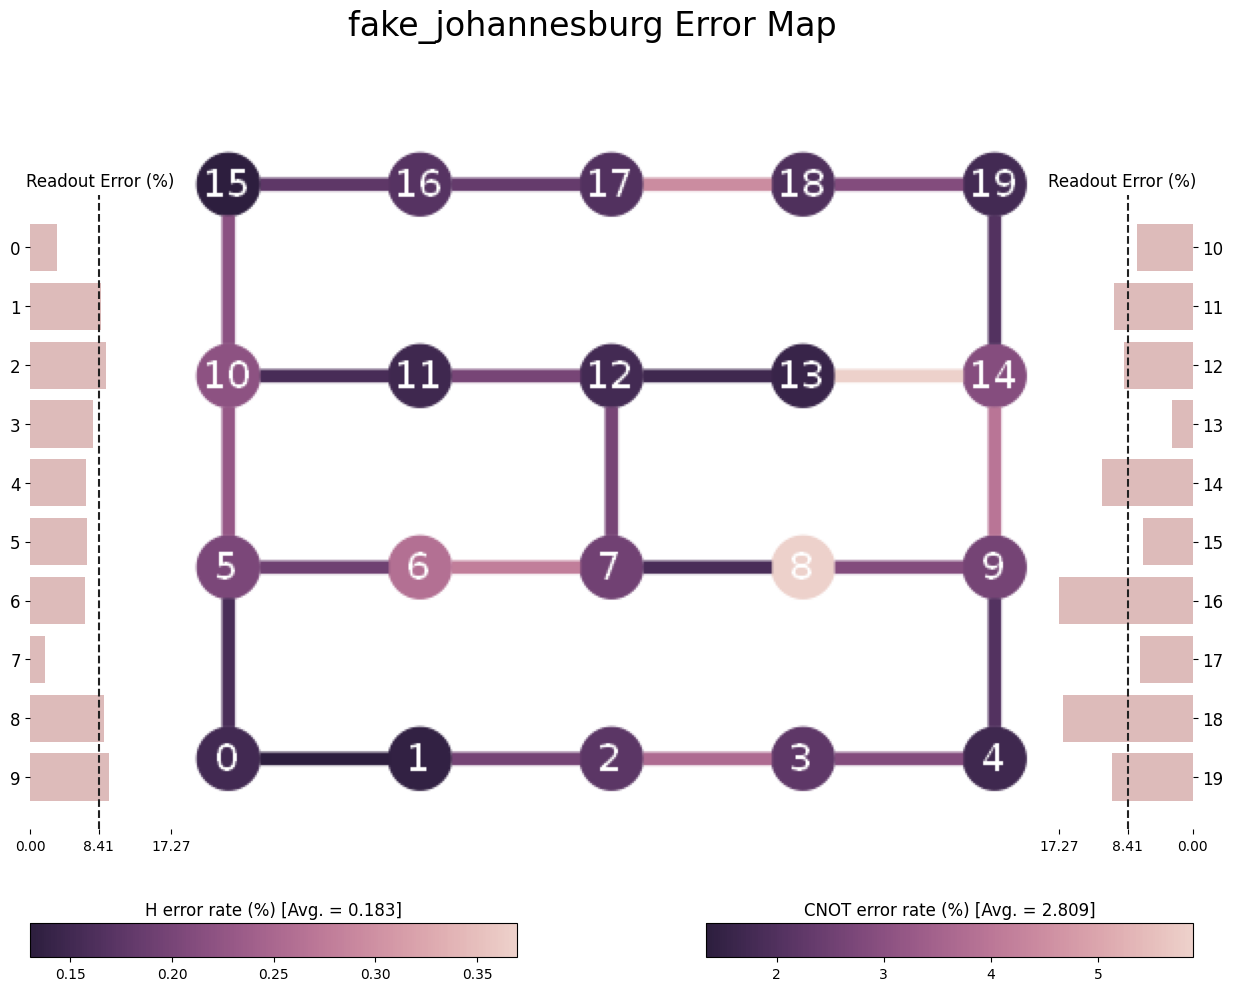

In [23]:
from qiskit.visualization import plot_error_map
plot_error_map(device_simulator)

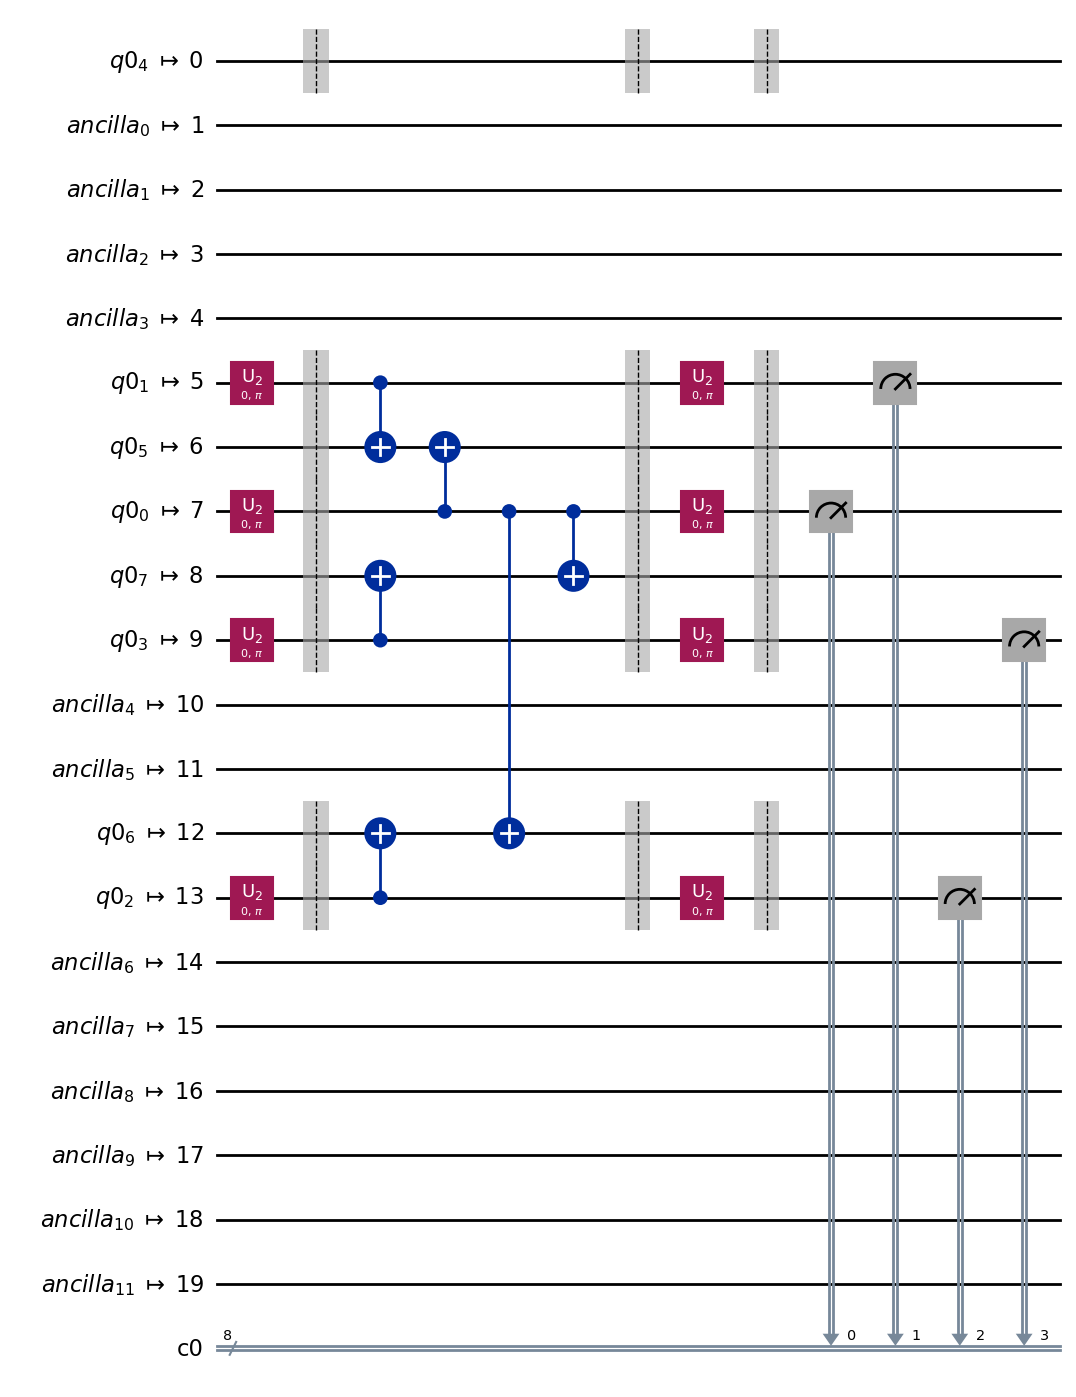

In [24]:
qc2 = transpile(qc,device_simulator)
qc2.draw('mpl')

{'00000000': 108, '00001100': 94, '00000011': 106, '00001001': 88, '00001010': 105, '00000010': 32, '00000100': 26, '00001111': 75, '00000110': 80, '00001011': 45, '00001000': 41, '00000101': 89, '00000001': 36, '00000111': 33, '00001110': 33, '00001101': 33}


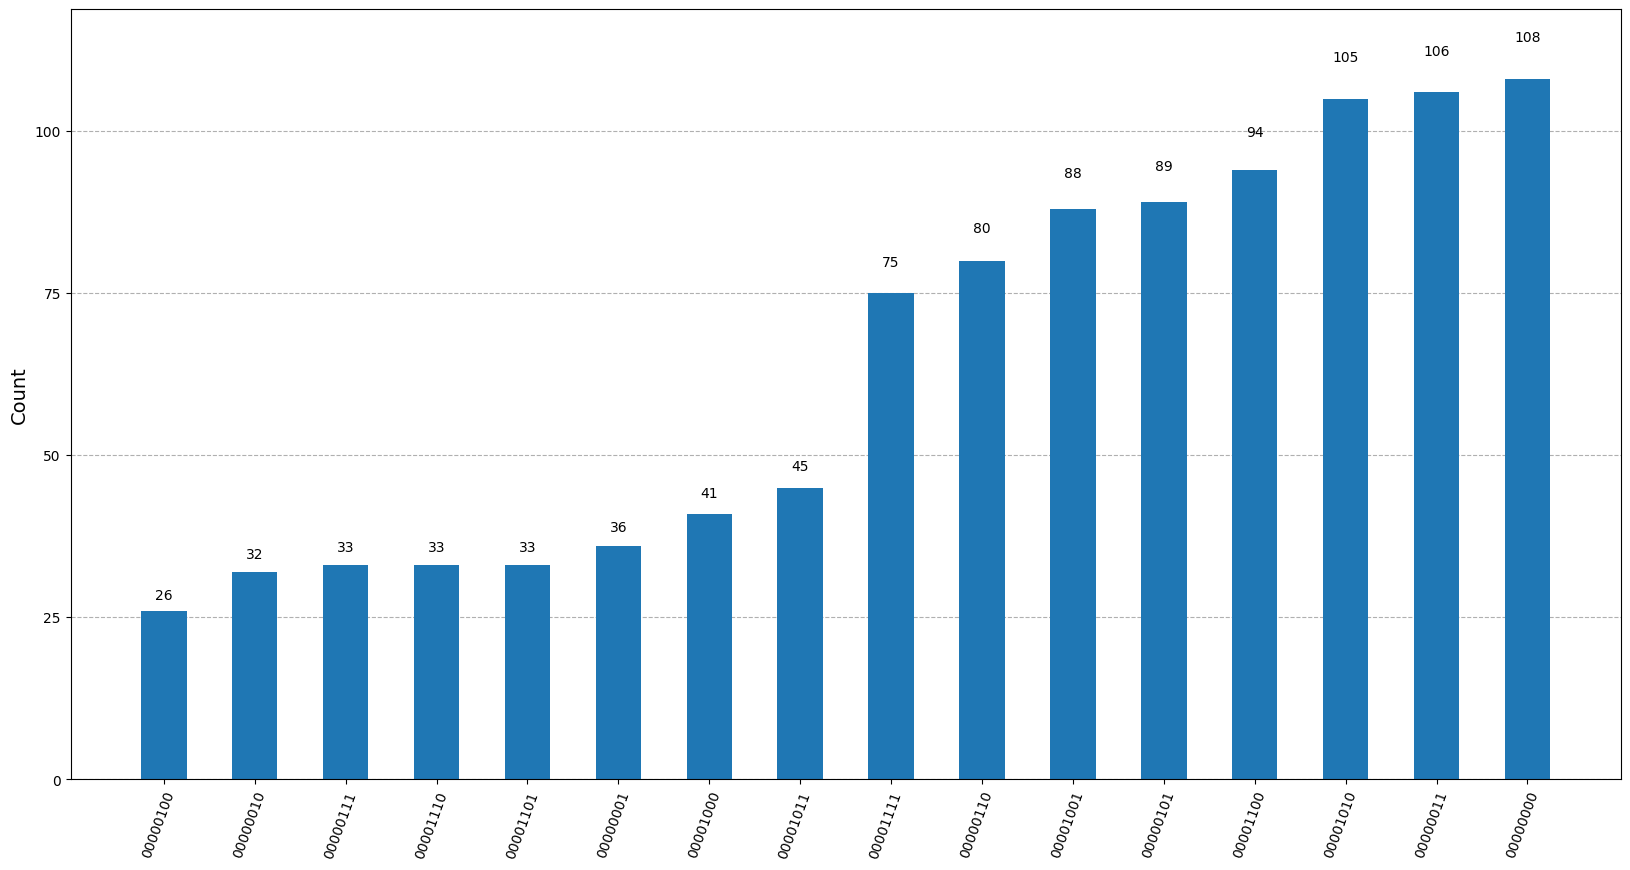

In [25]:
job = device_simulator.run(qc2,shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)

from qiskit.visualization import plot_histogram
plot_histogram(counts,figsize=(20,10),sort = 'value')